#### 【 지도학습 - 회귀 】
- 회귀(Regression) : 수치값을 예측하는 학습
    * 예 : 거리, 시간, 무게, 집가격 등등 ...
- 주제 : 생선 길이에 따른 무게를 예측하는 모델
- 방법 : 최근접이웃 알고리즘

[1] 모듈 로딩 및 데이터 준비 <hr>

In [ ]:
## ================================================
## [1-1] 모듈 로딩
## ================================================
## 기본 모듈
import pandas as pd
import numpy as np

## 시각화 관련 모듈
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML 데이터셋 및 확습관련 모듈
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


## CoW 활성화 : 복사와 공유 자동 설정 기능 활성화
pd.options.mode.copy_on_write = True

# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)

In [49]:
## ================================================
## [1-2] 데이터 준비 및 확인
## ================================================
## 데이터 준비
DATA_FILE = '../Data/fish_train_10500.csv'

## Bream, Smelt 생선 데이터만 추출
fishDF = pd.read_csv(DATA_FILE, usecols=[0, 1, 5])

dataDF = fishDF[ fishDF.Species.isin(['Bream', 'Smelt']) ]

         Weight   Length
Weight  1.00000  0.96938
Length  0.96938  1.00000 0.9693802347664204


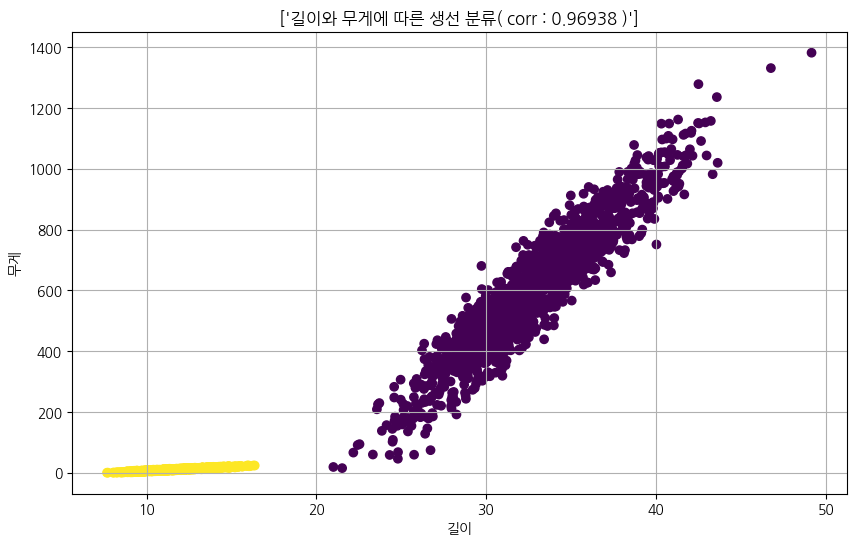

In [50]:
## 길이와 무게, 품종 관계 시각화
dataDF.Species = dataDF.Species.astype('category')
corr_ = dataDF.corr(numeric_only=True)

print(corr_, corr_['Weight']['Length'])
plt.figure(figsize=(10, 6))
plt.scatter(dataDF.Length, dataDF.Weight, c=dataDF.Species.cat.codes)
plt.xlabel('길이')
plt.ylabel('무게')
plt.grid()
plt.title([f"길이와 무게에 따른 생선 분류( corr : {corr_['Weight']['Length']:.5f} )"])
plt.show()

[2] 피쳐와 타겟/학습용과 테스트용 분리<hr>

In [51]:
## [2-1] 피쳐와 타겟 분리

featureDF = dataDF[dataDF.columns[1:-1]]    ## dataDF[ ['Length'] ]
targetSR  = dataDF[dataDF.columns[0]]       ## dataDF[  'Weight'  ]

print(f'featureDF : {featureDF.shape} {featureDF.ndim}D , targetSR : {targetSR.shape} {targetSR.ndim}D')

featureDF : (3000, 1) 2D , targetSR : (3000,) 1D


In [52]:
## [2-2] 학습용과 테스트용 분리 : 회귀 시에는 stratify 필요없음
##                             분류 시에는 클래스/라벨별 비율 설정을 위해서 stratify 필요
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.2,
                                                    random_state=10)
print(f'[TRAIN] x_train : {x_train.shape},  y_train : {y_train.shape}')
print(f'[TEST]  x_test  : {x_test.shape},   y_test  : {y_test.shape}')

[TRAIN] x_train : (2400, 1),  y_train : (2400,)
[TEST]  x_test  : (600, 1),   y_test  : (600,)


[3] 학습 진행 <hr>

In [53]:
## 모델 인스턴스 생성
kModel = KNeighborsRegressor()
kModel

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [54]:
## 학습 진행 => 학습용 데이터셋만 사용
kModel.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [55]:
## 학습 후 학습용데이터셋 기반 모델 파라미터 설정
## - 모델 파라미터 : 파라미터이름_
print( 'n_features_in_   :',   kModel.n_features_in_ )
print( 'feature_names_in_:',   kModel.feature_names_in_)
print( 'n_samples_fit_   :',   kModel.n_samples_fit_)

n_features_in_   : 1
feature_names_in_: ['Length']
n_samples_fit_   : 2400


[4] 성능평가 <hr>

In [56]:
## 훈련용 성능평가 & 테스트용 성능평가 비교
train_score =  kModel.score( x_train, y_train )
test_score  =  kModel.score( x_test, y_test )

print(f'[train_score] {train_score} ')
print(f'[test_score] {test_score} ')

[train_score] 0.9828286862394048 
[test_score] 0.9776944688636253 


[5] 예측 : 새로운 데이터 사용 <hr>
- predict(2D_새로운 피쳐) ==> 예측 무게 값
- n_neighbros의 무게를 추출 => 평균한 값과 예측 무게값이 같은지 체크

In [57]:
newDF = pd.DataFrame( [[20],[3],[45]] , columns=dataDF.columns[1:-1] )
newDF

,Length
0,20
1,3
2,45


In [75]:
## 예측값 추출
pre_weights = kModel.predict(newDF)
print(f'[pre_weights] {pre_weights[0]}')

## n_neighbors 찾기
dis_, indices = kModel.kneighbors(newDF)

n_idx = indices[0].tolist()

[pre_weights] 57.1103334885086


In [81]:
print( x_train.iloc[[0, 1]], end='\n\n')      ## DF => 위치인덱스
print( x_train.loc[[10092, 87]], end='\n\n')  ## DF => 라벨인덱스
print( y_train.iloc[0], y_train.loc[10092])

print('------------------------')
print('\nx_train.index', x_train.index, sep='\n')
print('\ny_train.index', y_train.index, sep='\n')

          Length
10092   9.833504
87     37.248502

          Length
10092   9.833504
87     37.248502

2.6021465214897748 2.6021465214897748
------------------------

x_train.index
Index([10092,    87,   729,  1065,  9498,   599,  9979,  9423,  9281, 10456,
       ...
        1032,  9542,  9449,  9020,   733,  9509,  1180,  1344,   527,  1289],
      dtype='int64', length=2400)

y_train.index
Index([10092,    87,   729,  1065,  9498,   599,  9979,  9423,  9281, 10456,
       ...
        1032,  9542,  9449,  9020,   733,  9509,  1180,  1344,   527,  1289],
      dtype='int64', length=2400)


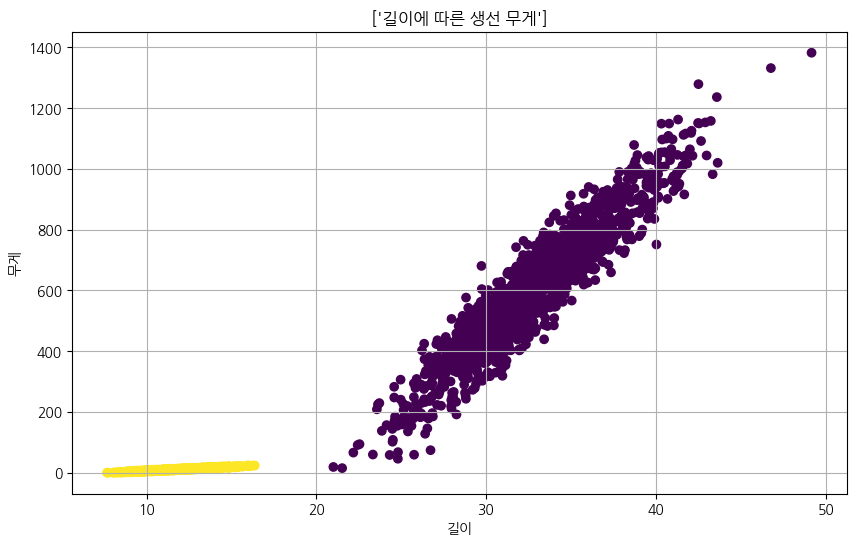

In [73]:
plt.figure(figsize=(10, 6))

##-> 기존 데이터셋
plt.scatter(dataDF.Length, dataDF.Weight, c=dataDF.Species.cat.codes)

##-> 새로운 데이터 [ 20 ] => 예측무게 [0]
plt.plot(newDF.iloc[0], pre_weights[0], c='red')

##-> 친구들

plt.xlabel('길이')
plt.ylabel('무게')
plt.grid()
plt.title([f"길이에 따른 생선 무게"])
plt.show()